# GRIP INTERNSHIP 

## DATA SCIENCE AND BUSINESS ANALYSIS TASK1

### Prediction using Supervised ML

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
# loading data
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("1st few rows of the data imported")
data.head(10)

1st few rows of the data imported


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Lets plot the data, *Hours vs Percentage of score*

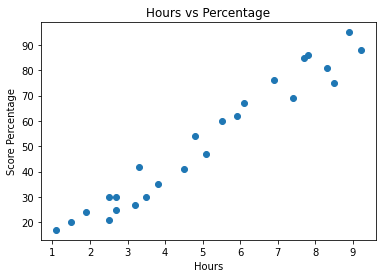

In [11]:
plt.figure()
plt.xlabel('Hours')
plt.ylabel('Score Percentage')
plt.title('Hours vs Percentage')
plt.scatter(data.iloc[:,0],data.iloc[:,1])

### Data Preparation

Divide the data into "attributes" (inputs) and "labels" (outputs).

In [16]:
X = data.iloc[:, :-1].values  
Y = data.iloc[:, 1].values 


Splitting Data in training and testing set,using Scikit-Learn's built-in train_test_split() method:

In [19]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                            test_size=0.3, random_state=3,shuffle=True) 

### Training

Now we will use Scikit-Learn's linaer model for linear regression.

In [20]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #fits the model 

print("Training complete.")

Training complete.


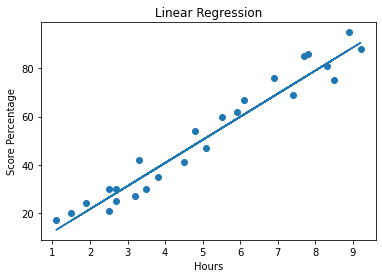

In [22]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, Y)
plt.plot(X, line)
plt.xlabel('Hours')
plt.ylabel('Score Percentage')
plt.title('Linear Regression')
plt.show()

### Making Prediction

In [23]:
print('The testing data is given as')
print(X_test)
y_pred = regressor.predict(X_test) # Predicting the scores

The testing data is given as
[[6.1]
 [1.9]
 [4.5]
 [6.9]
 [8.9]
 [2.5]
 [3.3]
 [3.2]]


In [24]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,67,60.910546
1,24,20.654943
2,41,45.575078
3,76,68.578280
4,95,87.747615
5,30,26.405743
6,42,34.073477
7,27,33.115010


In [27]:
# Testing with our own data
hours = 9.25
own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 91.10224822831282


### Evaluating Model

We will use root mean-square error and mean absoulte error to evaluate our model, Sklearn have built in modules metrics which will help us to do this.


In [31]:
from sklearn import metrics 
import math
print('Root mean square Error:', 
      math.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean square Error: 6.021036298091863


In [32]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 5.789935669612367
